In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 1. 이미지 준비

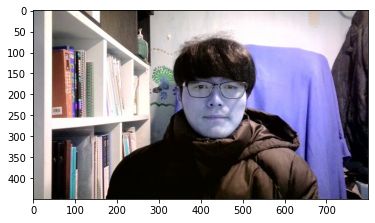

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/myimage.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)     # OpenCV는 색상을 표현할 때 RGB가 아닌 BGR, BGRA를 사용한다
plt.show()            

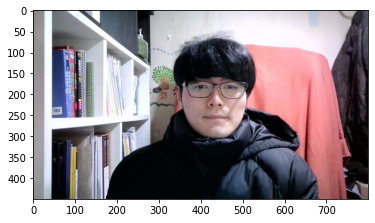

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   # matplotlib은 RGB를 사용하기 때문에 바꿔준다.
plt.imshow(img_rgb)
plt.show()

# 2. 얼굴 검출 (face detection)

In [4]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

In [5]:
print(dlib_rects)

rectangles[[(356, 150) (511, 305)]]


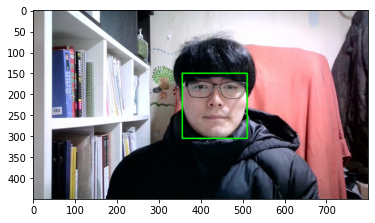

In [6]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 3. 얼굴 랜드마크 (face landmark)

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


### Object keypoint estimation 알고리즘 중 top-down 방식을 사용

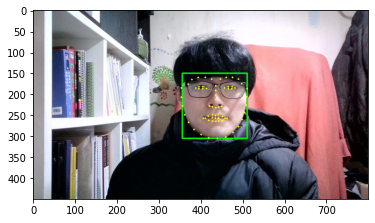

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
print(list_landmarks)

[[(354, 185), (354, 207), (357, 228), (362, 249), (371, 267), (384, 284), (401, 296), (419, 304), (440, 305), (460, 302), (477, 291), (490, 277), (499, 260), (505, 243), (509, 226), (510, 206), (511, 187), (370, 176), (379, 165), (394, 160), (411, 160), (426, 164), (447, 164), (461, 160), (476, 160), (490, 164), (498, 175), (436, 180), (436, 191), (436, 202), (436, 213), (421, 228), (428, 230), (436, 232), (443, 231), (450, 229), (388, 185), (396, 182), (405, 182), (414, 186), (405, 187), (396, 187), (457, 185), (466, 182), (475, 182), (482, 185), (474, 187), (466, 187), (406, 257), (418, 252), (428, 249), (435, 251), (442, 249), (452, 253), (463, 257), (452, 263), (443, 264), (436, 265), (428, 264), (419, 262), (411, 257), (428, 256), (435, 257), (443, 257), (458, 257), (442, 257), (435, 257), (428, 256)]]


In [11]:
print(dlib_rects)

rectangles[[(356, 150) (511, 305)]]


# 4. 얼굴 스티커 사용하기

In [12]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.height()//2
    print(dlib_rect.height())
    print(y)
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
print('-'*130)
print(tuple(zip(dlib_rects, list_landmarks)))

(436, 232)
156
154
(x,y) : (436,154)
(w,h) : (156,156)
----------------------------------------------------------------------------------------------------------------------------------
((rectangle(356,150,511,305), [(354, 185), (354, 207), (357, 228), (362, 249), (371, 267), (384, 284), (401, 296), (419, 304), (440, 305), (460, 302), (477, 291), (490, 277), (499, 260), (505, 243), (509, 226), (510, 206), (511, 187), (370, 176), (379, 165), (394, 160), (411, 160), (426, 164), (447, 164), (461, 160), (476, 160), (490, 164), (498, 175), (436, 180), (436, 191), (436, 202), (436, 213), (421, 228), (428, 230), (436, 232), (443, 231), (450, 229), (388, 185), (396, 182), (405, 182), (414, 186), (405, 187), (396, 187), (457, 185), (466, 182), (475, 182), (482, 185), (474, 187), (466, 187), (406, 257), (418, 252), (428, 249), (435, 251), (442, 249), (452, 253), (463, 257), (452, 263), (443, 264), (436, 265), (428, 264), (419, 262), (411, 257), (428, 256), (435, 257), (443, 257), (458, 257), (44

[두 직선의 교점 구하기](https://gaussian37.github.io/math-algorithm-intersection_point/)

In [13]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


In [14]:
refined_x = x - w // 2
refined_y = y 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (358,154)


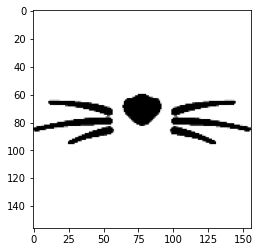

In [15]:
plt.imshow(img_sticker)

In [16]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (358,154)


In [17]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

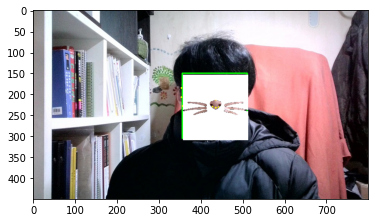

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

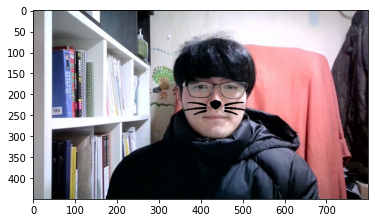

In [19]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 다양한 상황의 사진 사용해보기

## (1)방안이 어두울 때 찍은 사진 + 옆면 사진

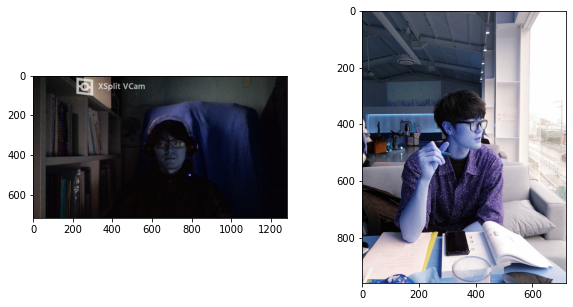

In [20]:
plt.figure(figsize=(10,5))
my_image_path2 = os.getenv('HOME')+'/aiffel/camera_sticker/myimages/black.png'
img_bgr2 = cv2.imread(my_image_path2)    
img_show2 = img_bgr2.copy()
plt.subplot(1, 2, 1)
plt.imshow(img_bgr2) 

my_image_path3 = os.getenv('HOME')+'/aiffel/camera_sticker/myimages/side.png'
img_bgr3 = cv2.imread(my_image_path3)    # OpenCV로 이미지를 불러옵니다
img_show3 = img_bgr3.copy()
plt.subplot(1, 2, 2)
plt.imshow(img_bgr3) 
plt.show()

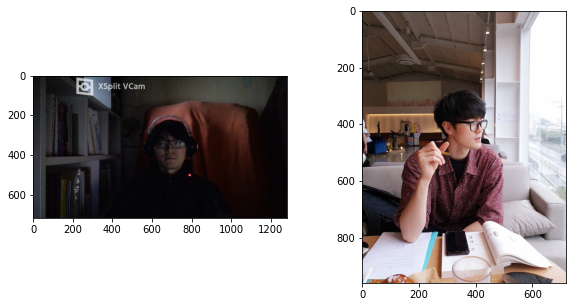

In [21]:
plt.figure(figsize=(10,5))
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB) 
plt.subplot(1, 2, 1)
plt.imshow(img_rgb2) 

img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(img_rgb3) 
plt.show()

### 옆면 사진은 인식을 못하는 것을 발견할 수 있었다

In [22]:
detector_hog2 = dlib.get_frontal_face_detector()
dlib_rects2 = detector_hog2(img_rgb2, 1)
print(dlib_rects2)

rectangles[[(593, 304) (778, 490)]]


In [23]:
detector_hog3 = dlib.get_frontal_face_detector()
dlib_rects3 = detector_hog3(img_rgb3, 1)
print(dlib_rects3)

rectangles[]


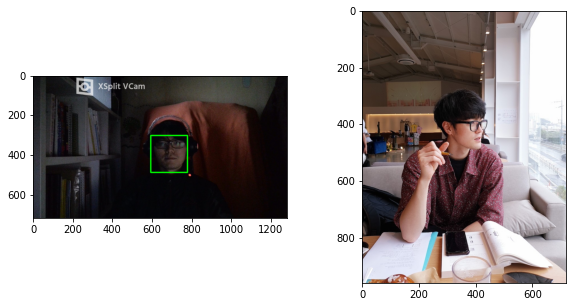

In [24]:
plt.figure(figsize=(10,5))
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show2, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_4)

img_show_rgb2 =  cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img_show_rgb2)
    
for dlib_rect in dlib_rects3:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show3, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb3 =  cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(img_show_rgb3)
plt.show()

## 주변이 어두운 사진 랜드마크

In [25]:
list_landmarks2 = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect2 in dlib_rects2:
    points = landmark_predictor(img_rgb2, dlib_rect2)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks2.append(list_points)

print(len(list_landmarks2[0]))

68


### 확대를 해본 결과 랜드마크가 제대로 찍히지 않은 것을 확인할 수 있었다.

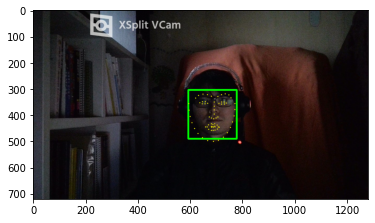

In [26]:
for landmark in list_landmarks2:
    for point in landmark:
        cv2.circle(img_show2, point, 2, (0, 255, 255), -1)

img_show_rgb2 = cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

## (2) 멀리서 찍은 사진과 마스크를 착용한 사진 

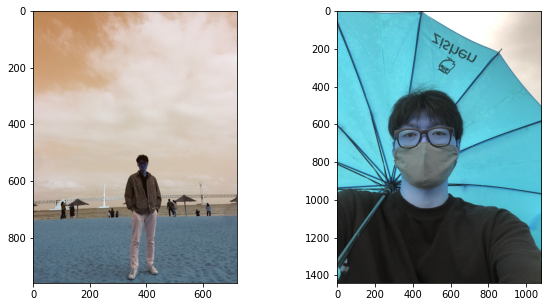

In [27]:
plt.figure(figsize=(10,5))
my_image_path4 = os.getenv('HOME')+'/aiffel/camera_sticker/myimages/far.png'
img_bgr4 = cv2.imread(my_image_path4)    
img_show4 = img_bgr4.copy()
plt.subplot(1, 2, 1)
plt.imshow(img_bgr4) 

my_image_path5 = os.getenv('HOME')+'/aiffel/camera_sticker/myimages/mask.png'
img_bgr5 = cv2.imread(my_image_path5)    # OpenCV로 이미지를 불러옵니다
img_show5 = img_bgr5.copy()
plt.subplot(1, 2, 2)
plt.imshow(img_bgr5) 
plt.show()

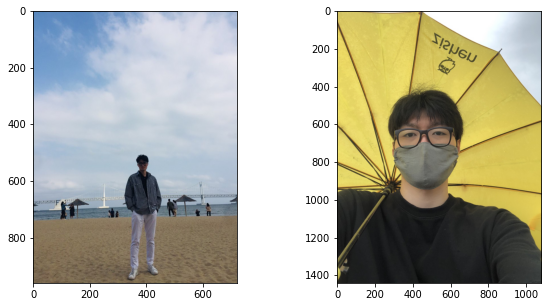

In [28]:
plt.figure(figsize=(10,5))
img_rgb4 = cv2.cvtColor(img_bgr4, cv2.COLOR_BGR2RGB) 
plt.subplot(1, 2, 1)
plt.imshow(img_rgb4) 

img_rgb5 = cv2.cvtColor(img_bgr5, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(img_rgb5) 
plt.show()

In [29]:
detector_hog4 = dlib.get_frontal_face_detector()
dlib_rects4 = detector_hog4(img_rgb4, 1)
print(dlib_rects4)

rectangles[[(369, 526) (405, 562)]]


### 마스크랑 안경을 통해 얼굴을 가린 사진은 좌표가 안나오는 것을 확인했다.

In [30]:
detector_hog5 = dlib.get_frontal_face_detector()
dlib_rects5 = detector_hog5(img_rgb5, 1)
print(dlib_rects5)

rectangles[]


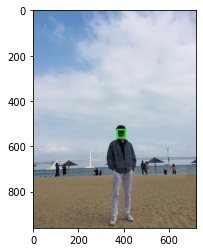

In [31]:
for dlib_rect in dlib_rects4:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show4, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_4)

img_show_rgb4 =  cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb4)
plt.show()

In [32]:
list_landmarks4 = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect4 in dlib_rects4:
    points = landmark_predictor(img_rgb4, dlib_rect4)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks4.append(list_points)

print(len(list_landmarks4[0]))

68


### 거리가 멀어지자 랜드마크가 제대로 인식이 안되는 것을 확인할 수 있었다.

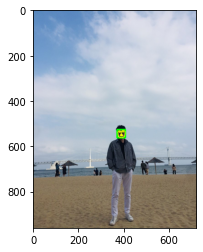

In [33]:
for landmark in list_landmarks4:
    for point in landmark:
        cv2.circle(img_show4, point, 2, (0, 255, 255), -1)

img_show_rgb4 = cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb4)
plt.show()

## (3) 얼굴 각도가 틀어진 사진 + 얼굴이 가까이 있는 사진

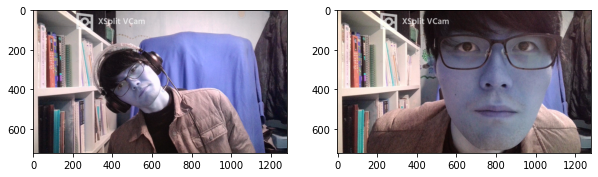

In [34]:
plt.figure(figsize=(10,5))
my_image_path6 = os.getenv('HOME')+'/aiffel/camera_sticker/myimages/rotate.png'
img_bgr6 = cv2.imread(my_image_path6)    
img_show6 = img_bgr6.copy()
plt.subplot(1, 2, 1)
plt.imshow(img_bgr6) 

my_image_path7 = os.getenv('HOME')+'/aiffel/camera_sticker/myimages/na.png'
img_bgr7 = cv2.imread(my_image_path7)    # OpenCV로 이미지를 불러옵니다
img_show7 = img_bgr7.copy()
plt.subplot(1, 2, 2)
plt.imshow(img_bgr7) 
plt.show()

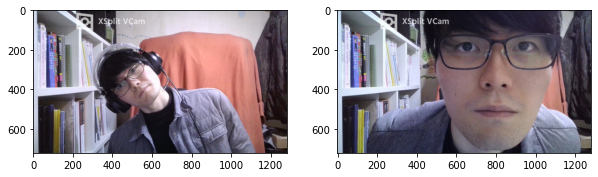

In [35]:
plt.figure(figsize=(10,5))
img_rgb6 = cv2.cvtColor(img_bgr6, cv2.COLOR_BGR2RGB) 
plt.subplot(1, 2, 1)
plt.imshow(img_rgb6) 

img_rgb7 = cv2.cvtColor(img_bgr7, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(img_rgb7) 
plt.show()

### 얼굴 각도가 틀어진 사진에서는 좌표를 찾지 못한다

In [36]:
detector_hog6 = dlib.get_frontal_face_detector()
dlib_rects6 = detector_hog6(img_rgb6, 1)
print(dlib_rects6)

rectangles[]


In [37]:
detector_hog7 = dlib.get_frontal_face_detector()
dlib_rects7 = detector_hog7(img_rgb7, 1)
print(dlib_rects7)

rectangles[[(428, 59) (1093, 724)]]


### 직사각형이 얼굴 밖에 범위에 생긴다.

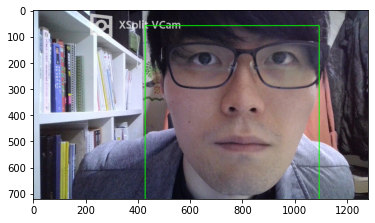

In [38]:
for dlib_rect in dlib_rects7:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show7, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb7 = cv2.cvtColor(img_show7, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb7)
plt.show()

In [39]:
list_landmarks7 = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect7 in dlib_rects7:
    points = landmark_predictor(img_rgb7, dlib_rect7)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks7.append(list_points)

print(len(list_landmarks7[0]))

68


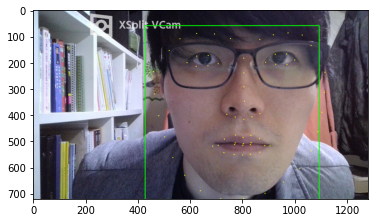

In [40]:
for landmark in list_landmarks7:
    for point in landmark:
        cv2.circle(img_show7, point, 2, (0, 255, 255), -1)

img_show_rgb7 = cv2.cvtColor(img_show7, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb7)
plt.show()

# 회고

옆면 사진에서 얼굴 형태를 인식 못하는 경우나 안경으로 인해 눈썹과 눈이 잘 안보여서 얼굴을 인식하지 못한 것 같다. 아니면 주변도 밝고 얼굴에 햇빛을 받아서 주변 배경색의 변화가 없어서 좌표가 안나온 것 같다. 얼굴의 형태를 인식하지 못하는 경우에 진짜로 좌표값이 나오지 않는다는 것을 확인하기위해 마스크를 장착하고 찍은 사진을 통해 실험해본 결과 얼굴의 인식을 방해하는 것이 있을때 작동하지 않는다는 것을 확실히 알 수 있었다. detector_hog는 주변색의 변화에 따라 표시된다. 어두운 사진의 랜드마크를 보면 그늘이 진 인중부분을 제대로 찾지 못하고 컴퓨터 불빛에 반사된 입술 부분에 인중 포인트가 생기는 것을 확인했다. 거리가 멀어진 경우에도 랜드마크가 제대로 찍히지 않는 것을 확인할 수 있었다. 얼굴이 기울어진 사진은 detector_hog가 제대로 작동하지 않은 이유는 얼굴이 기울어 졌다기 보다는 헤드셋의 영향이 있었거나, 머리카락이 눈썹을 가려서 생긴 오류로 생각한다. 얼굴을 가까이 하고 찍었을 경우 랜드마크가 실제 얼굴보다 사이간격이 넓게 찍히는 것을 확인할 수 있었다.